In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
path = 'data/ex2data1.txt'
# Exam1和Exam2分别是两门课程的分数，Accepted是是否录取的标记，1代表录取
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Accepted'])


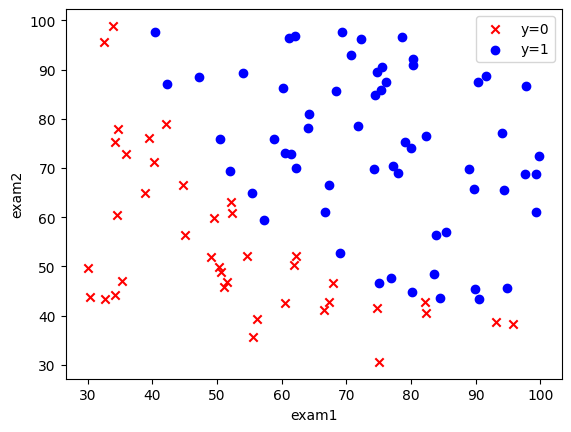

In [4]:
# 画出散点图
fig, ax = plt.subplots()
# 绘制没有被录取的散点图，横轴代表exam1的分数，纵轴代表exam2的分数
ax.scatter(data[data['Accepted'] == 0]['Exam 1'],
           data[data['Accepted'] == 0]['Exam 2'], c='r', marker='x', label='y=0')
# 绘制被录取的散点图，横轴代表exam1的分数，纵轴代表exam2的分数
ax.scatter(data[data['Accepted'] == 1]['Exam 1'],
           data[data['Accepted'] == 1]['Exam 2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set(xlabel='exam1', ylabel='exam2')
plt.show()


构造数据集，x和y

In [5]:
# 定义获取数据的函数
def get_Xy(data):
    data.insert(0, 'ones', 1)  # 添加一列 样本变为[1 x]
    X_ = data.iloc[:, 0:-1]  # 取前三列作为输入样本
    X = X_.values  # 转换为数组

    y_ = data.iloc[:, -1]  # 取最后一列作为真实值
    y = y_.values.reshape(len(y_), 1)  # 转换为numpy数据，重新变化维度为矩阵

    return X, y


In [6]:
X, y = get_Xy(data)  # 调用函数获取数据
print(X.shape, y.shape)


(100, 3) (100, 1)


In [7]:
# 定义联系函数，sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [8]:
# 定义损失函数
def costFunction(X, y, theta):
    A = sigmoid(X @ theta)  # 算出y的值

    first = y * np.log(A)  # 上式中的第一部分
    second = (1 - y) * np.log(1 - A)  # 上式中的第二部分

    return -np.sum(first + second) / len(X)


In [9]:
# 初始化theta的值，并求出损失函数初始值
theta = np.zeros((3, 1))  # 给theta赋初始值
theta.shape
cost_init = costFunction(X, y, theta)  # 算出初始损失值
print(cost_init)  # 打印初始损失值


0.6931471805599453


In [10]:
# 定义梯度下降函数
def gradientDescent(X, y, theta, iters, alpha):
    m = len(X)  # 求出样本个数
    costs = []  # 定义空列表存储每次算出来的损失

    for i in range(iters):
        A = sigmoid(X @ theta)  # 先计算g（X@theta），g为sigmoid函数即联系函数
        theta = theta - (alpha / m) * X.T @ (A - y)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return costs, theta


初始化 alpha和iters。后续自行改变参数，求解你认为的最好模型

In [11]:
alpha = 0.004
iters=200000

In [12]:
# 训练数据，通过调用梯度下降函数
costs, theta_final = gradientDescent(X, y, theta, iters, alpha)
print(theta_final)


1.9886538578930086
3.078170019864155
5.487009635362496
1.8519433661332634
2.955128942408358
5.438688730769618
1.8046128090728502
2.8312715776074047
5.3886531633606145
1.756153811712156
2.706676380747814
5.3365673644957425
1.7062807047694801
2.5818508519054255
5.281774101800353
1.6544129958512053
2.4578430947435748
5.223255119969365
1.5996612097145555
2.3362477519414617
5.159653459570274
1.5408871901849077
2.2190492038468888
5.089387088751128
1.4768567851081462
2.108268509053649
5.010845104587983
1.4064493632805872
2.005433890383271
4.9225734611717336
1.3288041261254449
1.9109646054893659
4.82325748482661
1.2432202250971693
1.8235866121521411
4.711246821296763
1.1486277932139581
1.7397667362448004
4.583257400457349
1.0423478306006673
1.652586574603404
4.430932868329269
0.9166267386002198
1.5465331276550855
4.224624720512681
0.7330944584991151
0.5277073720344672
3.888654102070563
1.3643729804575255
0.7562180112890663
0.9721312554958343
0.5959636118765947
0.3099729011348154
1.254607169191

In [13]:
# 定义预测函数
def predict(X, theta):
    prob = sigmoid(X @ theta)
    z = []
    for x in prob:
        # print(x)
        if x >= 0.5:
            z.append(1)
        else:
            z.append(0)
    return z


In [14]:
# 计算准确率， 通过自行修改参数找到最大的准确率
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)
acc = np.mean(y_pre == y)
print(acc)


0.86


In [15]:
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0]

In [16]:
# 画出决策边界
x = np.linspace(20, 100, 100)  # x代表的即为x1，f代表的原有的x2
f = coef1 + coef2 * x


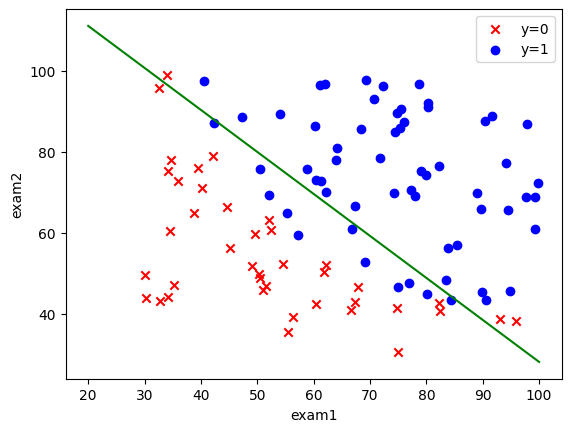

In [17]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Exam 1'],
           data[data['Accepted'] == 0]['Exam 2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted'] == 1]['Exam 1'],
           data[data['Accepted'] == 1]['Exam 2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set(xlabel='exam1',
       ylabel='exam2')

ax.plot(x, f, c='g')
plt.show()
